# Weather Photo Classification

In this excercise, you train a weather photo classifier by using Scikit-learn. Follow the instructions to train the model.

> This exercise uses the _Weather phenomenon database (WEAPD)_. Dataset source: Xiao, Haixia, 2021, "Weather phenomenon database (WEAPD)", https://doi.org/10.7910/DVN/M8JQCR, Harvard Dataverse, V1. The dataset is also available in Kaggle: https://www.kaggle.com/datasets/jehanbhathena/weather-dataset/data.

## 1. Import Packages

Import the required packages for this exercise.

In [1]:
from pathlib import Path

import PIL
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 2. Prepare the Data for Training

Split the data in train and validation subsets, and ensure that all images have the same size.

In [2]:
img_height = 64
img_width = 64

from PIL import Image
import os
import numpy as np


def load_images_from_dir(datasetdir: str, width: int, height: int, max_samples_by_class=500):
    X = []
    y = []
    for dirname in os.listdir(datasetdir):
        targetclass = dirname
        label_path = os.path.join(datasetdir, dirname)
        for filename in os.listdir(label_path)[:max_samples_by_class]:
            img_path = os.path.join(label_path, filename)
            img = Image.open(img_path).convert("RGB")
            img = img.resize((width, height))
            img = np.array(img)
            X.append(np.array(img))
            y.append(targetclass)

    return np.array(X), np.array(y)

X, y = load_images_from_dir("./dataset", img_width, img_height)

In [3]:
classes = np.unique(y)
classes

array(['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain',
       'rainbow', 'rime', 'sandstorm', 'snow'], dtype='<U9')

Split data in train and validation sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
X_test.shape

(1678, 64, 64, 3)

In [6]:
X_train[:9].shape

(9, 64, 64, 3)

Visualize some images in the training set:

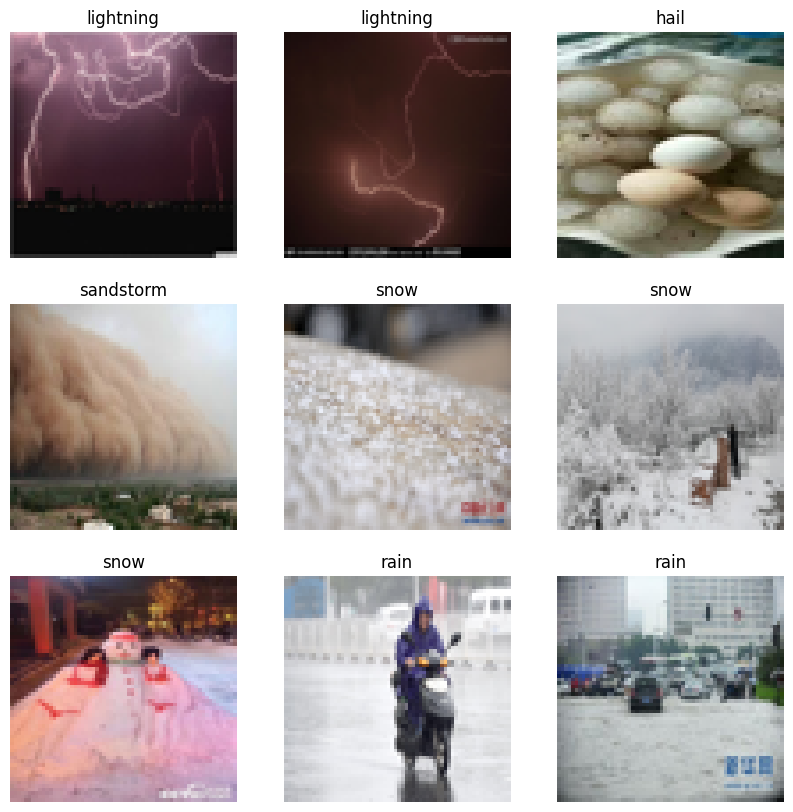

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, image in enumerate(X_train[:9]):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.astype("uint8"))
    plt.title(y_train[i])
    plt.axis("off")

## Training

Create the model

In [8]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Initialize the SVM classifier
svm_classifier = SVC()

# Initialize the label encoder to convert class labels to numeric labels
label_encoder = LabelEncoder()

Flatten images into a single dimension

In [9]:
def flat_images(X):
    return X.reshape(X.shape[0], -1)

X_train = flat_images(X_train)

In [10]:
y_as_numbers = label_encoder.fit_transform(y_train)

Train the model

In [ ]:
svm_classifier.fit(X_train, y_as_numbers)

In [ ]:
from sklearn.metrics import accuracy_score

y_test_as_numbers = label_encoder.transform(y_test)

predicted_y = svm_classifier.predict(flat_images(X_test))

#accuracy_score(y_test_as_numbers, predicted_y)

In [ ]:
from sklearn import datasets, metrics, svm

print(
    f"Classification report for classifier {svm_classifier} on training set:\n"
    f"{metrics.classification_report(y_as_numbers, svm_classifier.predict(X_train))}\n"
)

print(
    f"Classification report for classifier {svm_classifier} on evaluation set:\n"
    f"{metrics.classification_report(y_test_as_numbers, predicted_y)}\n"
)

## Testing with new image



In [ ]:
#new_photo_url = "https://live.staticflickr.com/650/23409765562_ec009c0d08_q_d.jpg"
#new_photo_path = tf.keras.utils.get_file(None, origin=new_photo_url)

PIL.Image.open("https://live.staticflickr.com/650/23409765562_ec009c0d08_q_d.jpg")

In [ ]:
img = tf.keras.utils.load_img(
    new_photo_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[np.argmax(score)], 100 * np.max(score))
)